In [0]:
#Authenticate into Google Drive and find file ids in order to read in data files
!pip install -U -q PyDrive

from pydrive.auth import GoogleAuth
from pydrive.drive import GoogleDrive
from google.colab import auth
from oauth2client.client import GoogleCredentials

# 1. Authenticate and create the PyDrive client.
auth.authenticate_user()
gauth = GoogleAuth()
gauth.credentials = GoogleCredentials.get_application_default()
drive = GoogleDrive(gauth)



In [2]:
#https://drive.google.com/file/d/1sL8ooo5l5Z89vi0dLn8zoTz9zfzfl82g/view?usp=sharing
# 2. Load files by ID and print its contents.

file_id = '1sL8ooo5l5Z89vi0dLn8zoTz9zfzfl82g' #Link Share the file and copy the id in the url after "id="
file = drive.CreateFile({'id': file_id}) #This creates a file in your virtual machine
file.GetContentFile('boston.csv') #This names the file you linked in drive "survey.csv"
!ls -lha #This lists all the folder in your local folder, you should see "survey.csv"

total 76K
drwxr-xr-x 1 root root 4.0K Jul 15 15:03 .
drwxr-xr-x 1 root root 4.0K Jul 15 15:01 ..
-rw-r--r-- 1 root root  36K Jul 15 15:03 boston.csv
drwx------ 4 root root 4.0K Jul 15 15:02 .cache
drwxr-xr-x 3 root root 4.0K Jul 15 15:02 .config
drwxr-xr-x 1 root root 4.0K Jul 15 15:03 datalab
drwxr-xr-x 4 root root 4.0K Jul 15 15:02 .forever
drwxr-xr-x 5 root root 4.0K Jul 15 15:02 .ipython
drwx------ 3 root root 4.0K Jul 15 15:02 .local


In [3]:
import pandas as pd 
import numpy as np 
import statsmodels.api as sm
import statsmodels.formula.api as smf  
import matplotlib.pyplot as plt 
from scipy import stats
import seaborn as sns
from sklearn import linear_model
from sklearn.linear_model import Lasso, ElasticNet, Ridge, LinearRegression
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import KFold
from sklearn.cross_validation import cross_val_score, cross_val_predict
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import KFold
from math import sqrt 

get_ipython().magic(u'matplotlib inline')
#these are some options to control output on your screen 
pd.set_option('display.notebook_repr_html', False) 
pd.set_option('display.max_columns', 40) 
pd.set_option('display.max_rows', 50) 
pd.set_option('display.width', 120)

/usr/local/lib/python2.7/dist-packages/statsmodels/compat/pandas.py:56: FutureWarning: The pandas.core.datetools module is deprecated and will be removed in a future version. Please use the pandas.tseries module instead.
  from pandas.core import datetools
/usr/local/lib/python2.7/dist-packages/sklearn/cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


In [0]:
# seed value for random number generators to obtain reproducible results
RANDOM_SEED = 1
SET_FIT_INTERCEPT = True

In [0]:
boston = pd.read_csv('boston.csv')

**Begin EDA**

In [6]:
print('')
print('----- Summary of Input Data -----')
print('')

# show the object is a DataFrame
print('Object type: ', type(boston))
print('')
# show number of observations in the DataFrame
print('Number of observations: ', len(boston))
print('')
# show variable names
print('Variable names: ', boston.columns)


----- Summary of Input Data -----

('Object type: ', <class 'pandas.core.frame.DataFrame'>)

('Number of observations: ', 506)

('Variable names: ', Index([u'neighborhood', u'crim', u'zn', u'indus', u'chas', u'nox', u'rooms', u'age', u'dis', u'rad', u'tax',
       u'ptratio', u'lstat', u'mv'],
      dtype='object'))


In [7]:
#show variable names, observations for each, data type for each
boston.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
neighborhood    506 non-null object
crim            506 non-null float64
zn              506 non-null float64
indus           506 non-null float64
chas            506 non-null int64
nox             506 non-null float64
rooms           506 non-null float64
age             506 non-null float64
dis             506 non-null float64
rad             506 non-null int64
tax             506 non-null int64
ptratio         506 non-null float64
lstat           506 non-null float64
mv              506 non-null float64
dtypes: float64(10), int64(3), object(1)
memory usage: 55.4+ KB


In [8]:
# How many Null values?
len(boston.index)-boston.count()

neighborhood    0
crim            0
zn              0
indus           0
chas            0
nox             0
rooms           0
age             0
dis             0
rad             0
tax             0
ptratio         0
lstat           0
mv              0
dtype: int64

In [9]:
boston.describe()

             crim          zn       indus        chas         nox       rooms         age         dis         rad  \
count  506.000000  506.000000  506.000000  506.000000  506.000000  506.000000  506.000000  506.000000  506.000000   
mean     3.613524   11.363636   11.136779    0.069170    0.554695    6.284634   68.574901    3.795043    9.549407   
std      8.601545   23.322453    6.860353    0.253994    0.115878    0.702617   28.148861    2.105710    8.707259   
min      0.006320    0.000000    0.460000    0.000000    0.385000    3.561000    2.900000    1.129600    1.000000   
25%      0.082045    0.000000    5.190000    0.000000    0.449000    5.885500   45.025000    2.100175    4.000000   
50%      0.256510    0.000000    9.690000    0.000000    0.538000    6.208500   77.500000    3.207450    5.000000   
75%      3.677082   12.500000   18.100000    0.000000    0.624000    6.623500   94.075000    5.188425   24.000000   
max     88.976200  100.000000   27.740000    1.000000    0.87100

In [10]:
boston.head()

  neighborhood     crim    zn  indus  chas    nox  rooms   age     dis  rad  tax  ptratio  lstat    mv
0       Nahant  0.00632  18.0   2.31     0  0.538  6.575  65.2  4.0900    1  296     15.3   4.98  24.0
1   Swampscott  0.02731   0.0   7.07     0  0.469  6.421  78.9  4.9671    2  242     17.8   9.14  21.6
2   Swanpscott  0.02729   0.0   7.07     0  0.469  7.185  61.1  4.9671    2  242     17.8   4.03  34.7
3   Marblehead  0.03237   0.0   2.18     0  0.458  6.998  45.8  6.0622    3  222     18.7   2.94  33.4
4   Marblehead  0.06905   0.0   2.18     0  0.458  7.147  54.2  6.0622    3  222     18.7   5.33  36.2

In [11]:
boston.tail()

    neighborhood     crim   zn  indus  chas    nox  rooms   age     dis  rad  tax  ptratio  lstat    mv
501     Winthrop  0.06263  0.0  11.93     0  0.573  6.593  69.1  2.4786    1  273     21.0   9.67  22.4
502     Winthrop  0.04527  0.0  11.93     0  0.573  6.120  76.7  2.2875    1  273     21.0   9.08  20.6
503     Winthrop  0.06076  0.0  11.93     0  0.573  6.976  91.0  2.1675    1  273     21.0   5.64  23.9
504     Winthrop  0.10959  0.0  11.93     0  0.573  6.794  89.3  2.3889    1  273     21.0   6.48  22.0
505     Winthrop  0.04741  0.0  11.93     0  0.573  6.030  80.8  2.5050    1  273     21.0   7.88  19.0

In [0]:
##drop neighborhood because it says so
boston = boston.drop('neighborhood', 1)

In [0]:
# correlation heat map setup for seaborn
def corr_chart(df_corr):
    corr=df_corr.corr()
    #screen top half to get a triangle
    top = np.zeros_like(corr, dtype=np.bool)
    top[np.triu_indices_from(top)] = True
    fig=plt.figure()
    fig, ax = plt.subplots(figsize=(12,12))
    sns.heatmap(corr, mask=top, cmap='coolwarm', 
        center = 0, square=True, 
        linewidths=.5, cbar_kws={'shrink':.5}, 
        annot = True, annot_kws={'size': 9}, fmt = '.3f')           
    plt.xticks(rotation=45) # rotate variable labels on columns (x axis)
    plt.yticks(rotation=0) # use horizontal variable labels on rows (y axis)
    plt.title('Correlation Heat Map')   
    plt.savefig('plot-corr-map.pdf', 
        bbox_inches = 'tight', dpi=None, facecolor='w', edgecolor='b', 
        orientation='portrait', papertype=None, format=None, 
        transparent=True, pad_inches=0.25, frameon=None)      

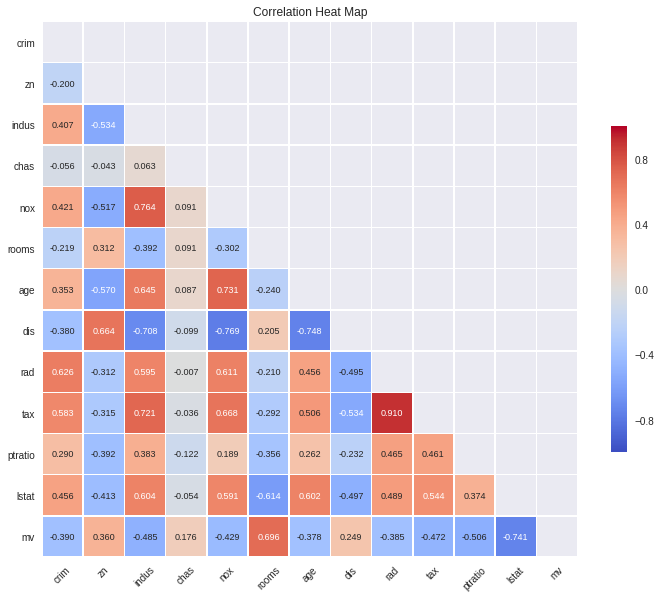

In [14]:
# examine intercorrelations
# with correlation matrix/heat map
corr_chart(df_corr = boston)

In [0]:
corr_matrix = boston.corr()

In [16]:
corr_matrix["mv"].sort_values(ascending=False)

mv         1.000000
rooms      0.696304
zn         0.360386
dis        0.249315
chas       0.175663
age       -0.377999
rad       -0.384766
crim      -0.389582
nox       -0.429300
tax       -0.471979
indus     -0.484754
ptratio   -0.505655
lstat     -0.740836
Name: mv, dtype: float64

**Begin Modeling**

In [17]:
# set up preliminary data for data for fitting the models 
# the first column is the median housing value response
# the remaining columns are the explanatory variables
prelim_model_data = np.array([boston.mv,\
    boston.crim,\
    boston.zn,\
    boston.indus,\
    boston.chas,\
    boston.nox,\
    boston.rooms,\
    boston.age,\
    boston.dis,\
    boston.rad,\
    boston.tax,\
    boston.ptratio,\
    boston.lstat]).T

# dimensions of the polynomial model X input and y response
# preliminary data before standardization
print('\nData dimensions:', prelim_model_data.shape)

# standard scores for the columns... along axis 0
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
print(scaler.fit(prelim_model_data))
# show standardization constants being employed
print(scaler.mean_)
print(scaler.scale_)

# the model data will be standardized form of preliminary model data
model_data = scaler.fit_transform(prelim_model_data)

# dimensions of the polynomial model X input and y response
# all in standardized units of measure
print('\nDimensions for model_data:', model_data.shape)



('\nData dimensions:', (506, 13))
StandardScaler(copy=True, with_mean=True, with_std=True)
[2.25288538e+01 3.61352356e+00 1.13636364e+01 1.11367787e+01
 6.91699605e-02 5.54695059e-01 6.28463439e+00 6.85749012e+01
 3.79504269e+00 9.54940711e+00 4.08237154e+02 1.84555336e+01
 1.26530632e+01]
[9.17309810e+00 8.59304135e+00 2.32993957e+01 6.85357058e+00
 2.53742935e-01 1.15763115e-01 7.01922514e-01 2.81210326e+01
 2.10362836e+00 8.69865112e+00 1.68370495e+02 2.16280519e+00
 7.13400164e+00]
('\nDimensions for model_data:', (506, 13))


In [0]:
names = ["Linear", "Ridge", "Lasso", "Elastic Net", "Ridge_1", "Lasso_1", "Elastic Net_1", "Ridge_.5", "Lasso_.5", "Elastic Net_.5"]
regressions = [LinearRegression(fit_intercept = SET_FIT_INTERCEPT), 
              Ridge(alpha=0.1, 
                    solver="cholesky", 
                    fit_intercept = SET_FIT_INTERCEPT,
                   random_state = RANDOM_SEED), 
              Lasso(alpha=0.1, 
                    fit_intercept = SET_FIT_INTERCEPT,
                   random_state = RANDOM_SEED), 
              ElasticNet(alpha=0.1, 
                         l1_ratio=0.5, 
                         fit_intercept = SET_FIT_INTERCEPT,
                        random_state = RANDOM_SEED), 
              Ridge(alpha=1, 
                    solver="cholesky", 
                    fit_intercept = SET_FIT_INTERCEPT,
                   random_state = RANDOM_SEED), 
              Lasso(alpha=1, 
                    fit_intercept = SET_FIT_INTERCEPT,
                   random_state = RANDOM_SEED), 
              ElasticNet(alpha=1, 
                         l1_ratio=0.5, 
                         fit_intercept = SET_FIT_INTERCEPT,
                        random_state = RANDOM_SEED), 
              Ridge(alpha=0.5, 
                    solver="cholesky", 
                    fit_intercept = SET_FIT_INTERCEPT,
                   random_state = RANDOM_SEED), 
              Lasso(alpha=0.5, 
                    fit_intercept = SET_FIT_INTERCEPT,
                   random_state = RANDOM_SEED), 
              ElasticNet(alpha=0.5, 
                         l1_ratio=0.5, 
                         fit_intercept = SET_FIT_INTERCEPT,
                        random_state = RANDOM_SEED)]

In [0]:
# ten-fold cross-validation employed here
N_FOLDS = 10

In [0]:
# set up numpy array for storing results
cv_results = np.zeros((N_FOLDS, len(names)))

kf = KFold(n_splits = N_FOLDS, shuffle=False, random_state = RANDOM_SEED)

In [21]:
# check the splitting process by looking at fold observation counts
index_for_fold = 0  # fold count initialized 
for train_index, test_index in kf.split(model_data):
    print('\nFold index:', index_for_fold,
          '------------------------------------------')
#   note that 0:model_data.shape[1]-1 slices for explanatory variables
#   and model_data.shape[1]-1 is the index for the response variable    
    X_train = model_data[train_index, 1:model_data.shape[1]]
    X_test = model_data[test_index, 1:model_data.shape[1]]
    y_train = model_data[train_index, 0]
    y_test = model_data[test_index, 0]   
    print('\nShape of input data for this fold:',
          '\nData Set: (Observations, Variables)')
    print('X_train:', X_train.shape)
    print('X_test:',X_test.shape)
    print('y_train:', y_train.shape)
    print('y_test:',y_test.shape)

    index_for_method = 0  # initialize
    for name, lin_model in zip(names, regressions):
        print('\nRegression evaluation for:', name)
        print('  Scikit Learn method:', lin_model)
        lin_model.fit(X_train, y_train)  # fit on the train set for this fold
        print('Fitted regression intercept:', lin_model.intercept_)
        print('Fitted regression coefficients:', lin_model.coef_)
        # evaluate on the test set for this fold
        y_test_predict = lin_model.predict(X_test)
        print('Coefficient of determination (R-squared):',
              r2_score(y_test, y_test_predict))
        fold_method_result = sqrt(mean_squared_error(y_test, y_test_predict))
        print(lin_model.get_params(deep=True))
        print('Root mean-squared error:', fold_method_result,
              '\n--------------------------------------------------------\n')
        cv_results[index_for_fold, index_for_method] = fold_method_result
        index_for_method += 1
    
    index_for_fold += 1

('\nFold index:', 0, '------------------------------------------')
('\nShape of input data for this fold:', '\nData Set: (Observations, Variables)')
('X_train:', (455, 12))
('X_test:', (51, 12))
('y_train:', (455,))
('y_test:', (51,))
('\nRegression evaluation for:', 'Linear')
('  Scikit Learn method:', LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False))
('Fitted regression intercept:', -0.005032049293645771)
('Fitted regression coefficients:', array([-0.11088775,  0.13573238,  0.01408652,  0.0787664 , -0.23758124,
        0.26794267,  0.0065031 , -0.37082275,  0.27035218, -0.23150162,
       -0.21456859, -0.45500336]))
('Coefficient of determination (R-squared):', 0.7650752349379011)
{'copy_X': True, 'normalize': False, 'n_jobs': 1, 'fit_intercept': True}
('Root mean-squared error:', 0.3080338355432654, '\n--------------------------------------------------------\n')
('\nRegression evaluation for:', 'Ridge')
('  Scikit Learn method:', Ridge(alpha=0.1, copy_X=T


('Fitted regression intercept:', -0.0949950454027201)
('Fitted regression coefficients:', array([-0.        ,  0.        , -0.        ,  0.        , -0.        ,
        0.01949199, -0.        ,  0.        , -0.        , -0.        ,
       -0.        , -0.11611861]))
('Coefficient of determination (R-squared):', -0.6416324068677006)
{'normalize': False, 'warm_start': False, 'selection': 'cyclic', 'fit_intercept': True, 'l1_ratio': 0.5, 'max_iter': 1000, 'precompute': False, 'random_state': 1, 'tol': 0.0001, 'positive': False, 'copy_X': True, 'alpha': 1}
('Root mean-squared error:', 1.3792635002501465, '\n--------------------------------------------------------\n')
('\nRegression evaluation for:', 'Ridge_.5')
('  Scikit Learn method:', Ridge(alpha=0.5, copy_X=True, fit_intercept=True, max_iter=None,
   normalize=False, random_state=1, solver='cholesky', tol=0.001))
('Fitted regression intercept:', -0.01408979745572464)
('Fitted regression coefficients:', array([-0.11658631,  0.1100448

In [0]:
cv_results_df = pd.DataFrame(cv_results)
cv_results_df.columns = names

In [23]:
pd.set_option('precision', 5)
print('Root Mean Squared Errors\n----------------------------------------------')
#print('Average results from ', N_FOLDS, '-fold cross-validation\n',
#      'in standardized units (mean 0, standard deviation 1)\n',
#      '\nMethod Root mean-squared error', sep = '') 
print(cv_results_df.mean())   
with open("cv-results-df-mean.txt", "w") as text_file:
    text_file.write('\nAverage results from '+ str(N_FOLDS) + '-fold cross-validation\n'+
                    'in standardized units (mean 0, standard deviation 1)\n'+
                     '\nMethod Root mean-squared error:\n'+ 
                     str(cv_results_df.mean()))

Root Mean Squared Errors
----------------------------------------------
Linear            0.56194
Ridge             0.56179
Lasso             0.58697
Elastic Net       0.56845
Ridge_1           0.56051
Lasso_1           0.96809
Elastic Net_1     0.85004
Ridge_.5          0.56121
Lasso_.5          0.83038
Elastic Net_.5    0.67567
dtype: float64


Ridge with alpha of 1 performed the best, based on the lowest RMSE. Now lets use the unstandardized dataset and run through the same algorithm

In [24]:
boston.columns

Index([u'crim', u'zn', u'indus', u'chas', u'nox', u'rooms', u'age', u'dis', u'rad', u'tax', u'ptratio', u'lstat',
       u'mv'],
      dtype='object')

In [0]:
#X=boston[['mv','crim', 'zn', 'indus', 'chas', 'nox', 'rooms', 'age', 'dis', 'rad', 'tax', 'ptratio', 'lstat']]
#y=boston[['mv']]

In [0]:
#|X.columns
#X_train, X_test, y_train, y_test = train_test_split(
#...     X, y, test_size=0.33, random_state=42)

In [39]:
# check the splitting process by looking at fold observation counts
index_for_fold = 0  # fold count initialized 
for train_index, test_index in kf.split(prelim_model_data):
    print('\nFold index:', index_for_fold,
          '------------------------------------------')
#   note that 0:model_data.shape[1]-1 slices for explanatory variables
#   and model_data.shape[1]-1 is the index for the response variable    
    X_train = prelim_model_data[train_index, 1:prelim_model_data.shape[1]]
    X_test = prelim_model_data[test_index, 1:prelim_model_data.shape[1]]
    y_train = prelim_model_data[train_index, 0]
    y_test = prelim_model_data[test_index, 0]   
    print('\nShape of input data for this fold:',
          '\nData Set: (Observations, Variables)')
    print('X_train:', X_train.shape)
    print('X_test:',X_test.shape)
    print('y_train:', y_train.shape)
    print('y_test:',y_test.shape)

    index_for_method = 0  # initialize
    for name, lin_model in zip(names, regressions):
        print('\nRegression evaluation for:', name)
        print('  Scikit Learn method:', lin_model)
        lin_model.fit(X_train, y_train)  # fit on the train set for this fold
        print('Fitted regression intercept:', lin_model.intercept_)
        print('Fitted regression coefficients:', lin_model.coef_)
        # evaluate on the test set for this fold
        y_test_predict = lin_model.predict(X_test)
        print('Coefficient of determination (R-squared):',
              r2_score(y_test, y_test_predict))
        fold_method_result = sqrt(mean_squared_error(y_test, y_test_predict))
        print(lin_model.get_params(deep=True))
        print('Root mean-squared error:', fold_method_result,
              '\n--------------------------------------------------------\n')
        cv_results[index_for_fold, index_for_method] = fold_method_result
        index_for_method += 1
    
    index_for_fold += 1

('\nFold index:', 0, '------------------------------------------')
('\nShape of input data for this fold:', '\nData Set: (Observations, Variables)')
('X_train:', (455, 12))
('X_test:', (51, 12))
('y_train:', (455,))
('y_test:', (51,))
('\nRegression evaluation for:', 'Linear')
('  Scikit Learn method:', LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False))
('Fitted regression intercept:', 42.94831053147826)
('Fitted regression coefficients:', array([-1.18373016e-01,  5.34385738e-02,  1.88539674e-02,  2.84749568e+00,
       -1.88259963e+01,  3.50161780e+00,  2.12131600e-03, -1.61701255e+00,
        2.85097890e-01, -1.26125846e-02, -9.10049014e-01, -5.85056003e-01]))
('Coefficient of determination (R-squared):', 0.7650752349379002)
{'copy_X': True, 'normalize': False, 'n_jobs': 1, 'fit_intercept': True}
('Root mean-squared error:', 2.8256245911114384, '\n--------------------------------------------------------\n')
('\nRegression evaluation for:', 'Ridge')
('  Scik

('Fitted regression coefficients:', array([-0.0898929 ,  0.06620692, -0.02752929,  0.        , -0.        ,
        1.4249508 ,  0.02086522, -1.00581047,  0.23604548, -0.01397817,
       -0.74199477, -0.76636347]))
('Coefficient of determination (R-squared):', 0.47683663077705163)
{'normalize': False, 'warm_start': False, 'selection': 'cyclic', 'fit_intercept': True, 'positive': False, 'max_iter': 1000, 'precompute': False, 'random_state': 1, 'tol': 0.0001, 'copy_X': True, 'alpha': 0.5}
('Root mean-squared error:', 6.044876639654467, '\n--------------------------------------------------------\n')
('\nRegression evaluation for:', 'Elastic Net_.5')
('  Scikit Learn method:', ElasticNet(alpha=0.5, copy_X=True, fit_intercept=True, l1_ratio=0.5,
      max_iter=1000, normalize=False, positive=False, precompute=False,
      random_state=1, selection='cyclic', tol=0.0001, warm_start=False))
('Fitted regression intercept:', 44.60159916804844)
('Fitted regression coefficients:', array([-0.097476

In [0]:
cv_results_df = pd.DataFrame(cv_results)
cv_results_df.columns = names

In [41]:
pd.set_option('precision', 5)
print('Root Mean Squared Errors\n----------------------------------------------')
#print('Average results from ', N_FOLDS, '-fold cross-validation\n',
#      'in standardized units (mean 0, standard deviation 1)\n',
#      '\nMethod Root mean-squared error', sep = '') 
print(cv_results_df.mean())   
with open("cv-results-df-mean.txt", "w") as text_file:
    text_file.write('\nAverage results from '+ str(N_FOLDS) + '-fold cross-validation\n'+
                    'in standardized units (mean 0, standard deviation 1)\n'+
                     '\nMethod Root mean-squared error:\n'+ 
                     str(cv_results_df.mean()))

Root Mean Squared Errors
----------------------------------------------
Linear            5.15473
Ridge             5.13838
Lasso             5.13338
Elastic Net       5.08043
Ridge_1           5.08482
Lasso_1           5.52316
Elastic Net_1     5.28702
Ridge_.5          5.10195
Lasso_.5          5.25595
Elastic Net_.5    5.15085
dtype: float64


In [0]:
#With out standardized obseervaitons Elastic Net with .1 has the smallest RMSE.
#lets look at just that one

In [0]:
X=boston[['crim', 'zn', 'indus', 'chas', 'nox', 'rooms', 'age', 'dis', 'rad', 'tax', 'ptratio', 'lstat']]
y=boston[['mv']]

In [0]:
elastic_net=ElasticNet(alpha=0.1, 
                         l1_ratio=0.5, 
                         fit_intercept = SET_FIT_INTERCEPT,
                        random_state = RANDOM_SEED)

In [47]:
elastic_net.fit(X,y)

ElasticNet(alpha=0.1, copy_X=True, fit_intercept=True, l1_ratio=0.5,
      max_iter=1000, normalize=False, positive=False, precompute=False,
      random_state=1, selection='cyclic', tol=0.0001, warm_start=False)

In [48]:
elastic_net.coef_

array([-0.11216605,  0.05318999, -0.05372293,  1.07483501, -0.11746863,
        3.10897999, -0.00518971, -1.20704105,  0.2663905 , -0.01578661,
       -0.73847995, -0.63244652])

In [49]:
elastic_net.intercept_

array([33.84893839])